# Data exploration notebook

Install libraries

In [1]:
# Importing standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

from botocore.client import Config
import ibm_boto3
import csv

import matplotlib.pyplot as plt
import random

Define credentials to access a IBM cloud bucket storage

In [2]:
# The code was removed by Watson Studio for sharing.

We define a function to read rgb data from a pickle file provided by the customer

In [3]:
# Defining function for loading dataset from 'pickle' file
def load_rgb_data(file):
    # Opening 'pickle' file and getting images
    with open(file, 'rb') as f:
        d = pickle.load(f, encoding='latin1')  # dictionary type, we use 'latin1' for python3
        # At the same time method 'astype()' used for converting ndarray from int to float
        # It is needed to divide float by float when applying Normalization
        x = d['features'].astype(np.float32)   # 4D numpy.ndarray type, for train = (34799, 32, 32, 3)
        y = d['labels']                        # 1D numpy.ndarray type, for train = (34799,)
        s = d['sizes']                         # 2D numpy.ndarray type, for train = (34799, 2)
        c = d['coords']                        # 2D numpy.ndarray type, for train = (34799, 4)
        """
        Data is a dictionary with four keys:
            'features' - is a 4D array with raw pixel data of the traffic sign images,
                         (number of examples, width, height, channels).
            'labels'   - is a 1D array containing the label id of the traffic sign image,
                         file label_names.csv contains id -> name mappings.
            'sizes'    - is a 2D array containing arrays (width, height),
                         representing the original width and height of the image.
            'coords'   - is a 2D array containing arrays (x1, y1, x2, y2),
                         representing coordinates of a bounding frame around the image.
        """

    # Returning ready data
    return x, y, s, c

The customer has provided 3 separate sets for training, validation and testing. In addition to this, the customer has provided a separate csv file with the description of every class (traffic sign description). We define a function to obtain the description of each classWe load into a dictionary of numpy arrays and we load the description into a pandas dataframe

In [4]:
cos.download_file(Bucket=credentials['BUCKET'], Key='train.pickle', Filename='train.pickle')   
cos.download_file(Bucket=credentials['BUCKET'], Key='valid.pickle', Filename='valid.pickle')
cos.download_file(Bucket=credentials['BUCKET'], Key='test.pickle', Filename='test.pickle')
cos.download_file(Bucket=credentials['BUCKET'], Key='label_names.csv', Filename='label_names.csv')

# Loading rgb data from training dataset
x_train, y_train, s_train, c_train = load_rgb_data('train.pickle')

#
# # Loading rgb data from validation dataset
x_validation, y_validation, s_validation, c_validation = load_rgb_data('valid.pickle')
#
# # Loading rgb data from test dataset
x_test, y_test, s_test, c_test = load_rgb_data('test.pickle')

# # Getting texts for every class
labels = pd.read_csv('label_names.csv', delimiter=',')

We print the shapes of each set

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


As we can see a set of 34799 images of 32x32x3 is provided for training, 4410 images for validation and 12630 for testing

Let's visualize some sample image. Apparently values are float in a scale 0-255

In [6]:
x_train[1]

array([[[28., 24., 24.],
        [26., 23., 23.],
        [27., 24., 24.],
        ...,
        [31., 28., 26.],
        [31., 28., 27.],
        [32., 28., 27.]],

       [[27., 24., 24.],
        [27., 24., 24.],
        [28., 25., 24.],
        ...,
        [31., 27., 25.],
        [31., 27., 26.],
        [33., 29., 27.]],

       [[26., 24., 24.],
        [26., 24., 24.],
        [27., 24., 23.],
        ...,
        [31., 26., 25.],
        [31., 27., 26.],
        [33., 29., 27.]],

       ...,

       [[28., 25., 23.],
        [30., 27., 24.],
        [30., 27., 24.],
        ...,
        [27., 24., 22.],
        [27., 24., 22.],
        [28., 24., 22.]],

       [[27., 24., 22.],
        [29., 26., 23.],
        [31., 26., 24.],
        ...,
        [26., 23., 21.],
        [27., 24., 22.],
        [28., 25., 23.]],

       [[28., 24., 23.],
        [28., 24., 22.],
        [29., 24., 22.],
        ...,
        [27., 23., 22.],
        [27., 24., 23.],
        [29., 26., 25.]]

We visualize a random set of images of the training set

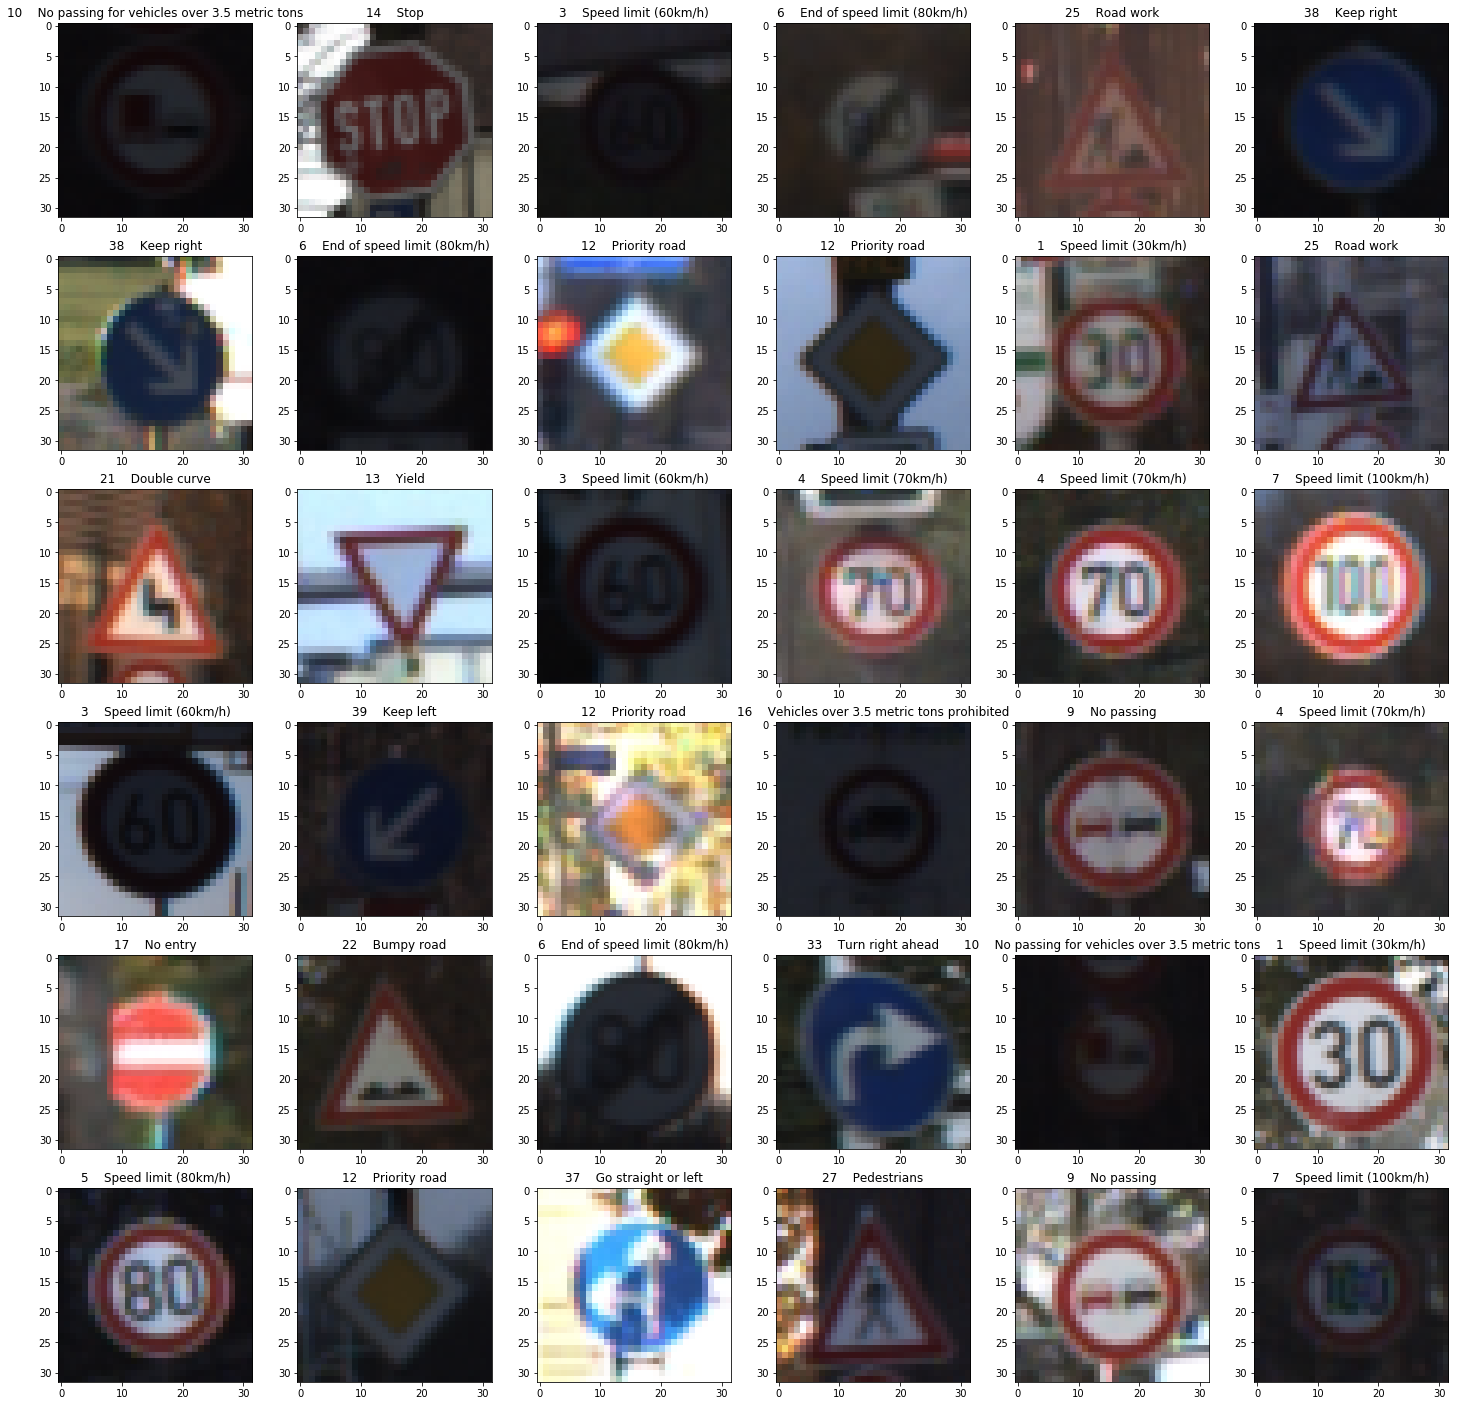

In [7]:
#show example images of the training set

rows = 6
cols = 6

fig, axs = plt.subplots(rows,cols, figsize = (25,25))

for i in range(rows):
    for j in range(cols):
        
        sample = int(np.size(x_train,0)*random.random())
        ClassId = y_train[sample]
        label = labels[labels["ClassId"] == ClassId]["SignName"].to_string()        
        axs[i,j].imshow(x_train[sample]/255)
        axs[i,j].set_title(label)
    
fig.show()

We visualize a random set of images of the validation set

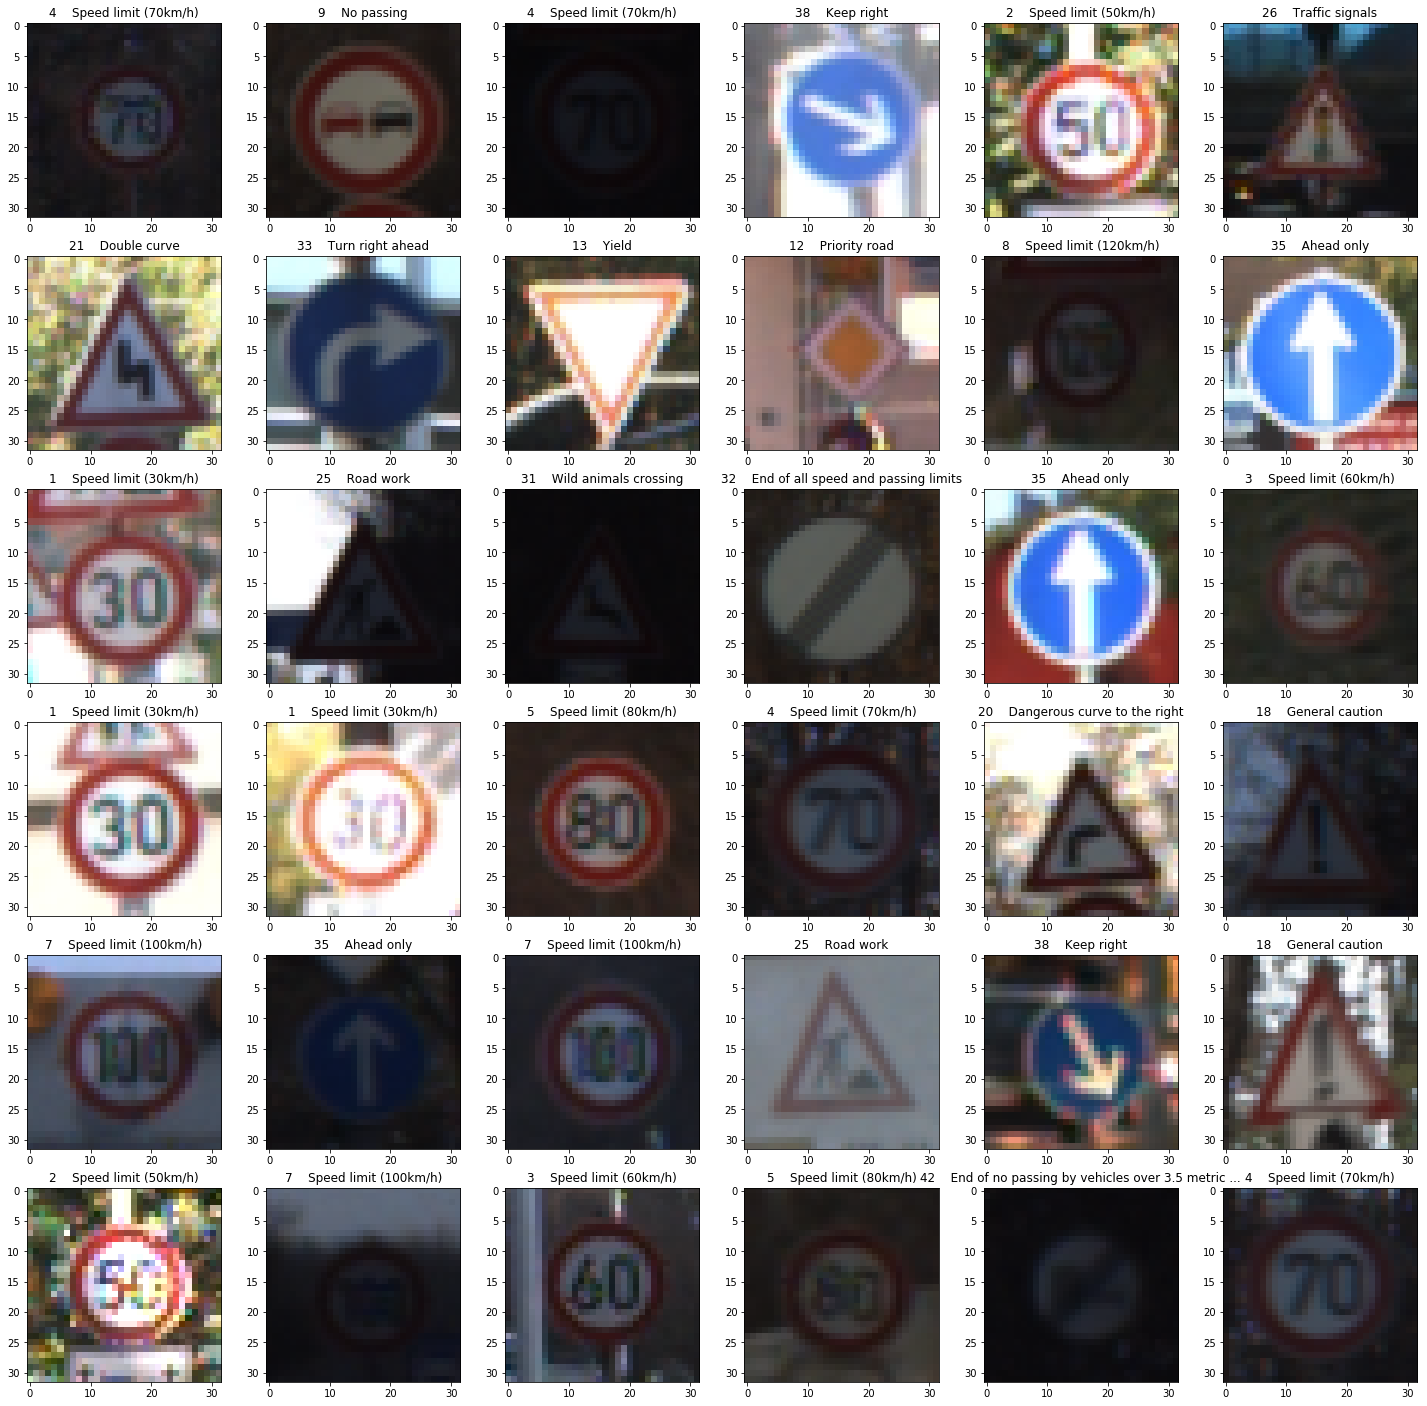

In [8]:
#show example images of the validation set

rows = 6
cols = 6

fig, axs = plt.subplots(rows,cols, figsize = (25,25))

for i in range(rows):
    for j in range(cols):
        
        sample = int(np.size(x_validation,0)*random.random())
        ClassId = y_validation[sample]
        label = labels[labels["ClassId"] == ClassId]["SignName"].to_string()        
        axs[i,j].imshow(x_validation[sample]/255)
        axs[i,j].set_title(label)
    
fig.show()

We visualize a random set of images of the testing set

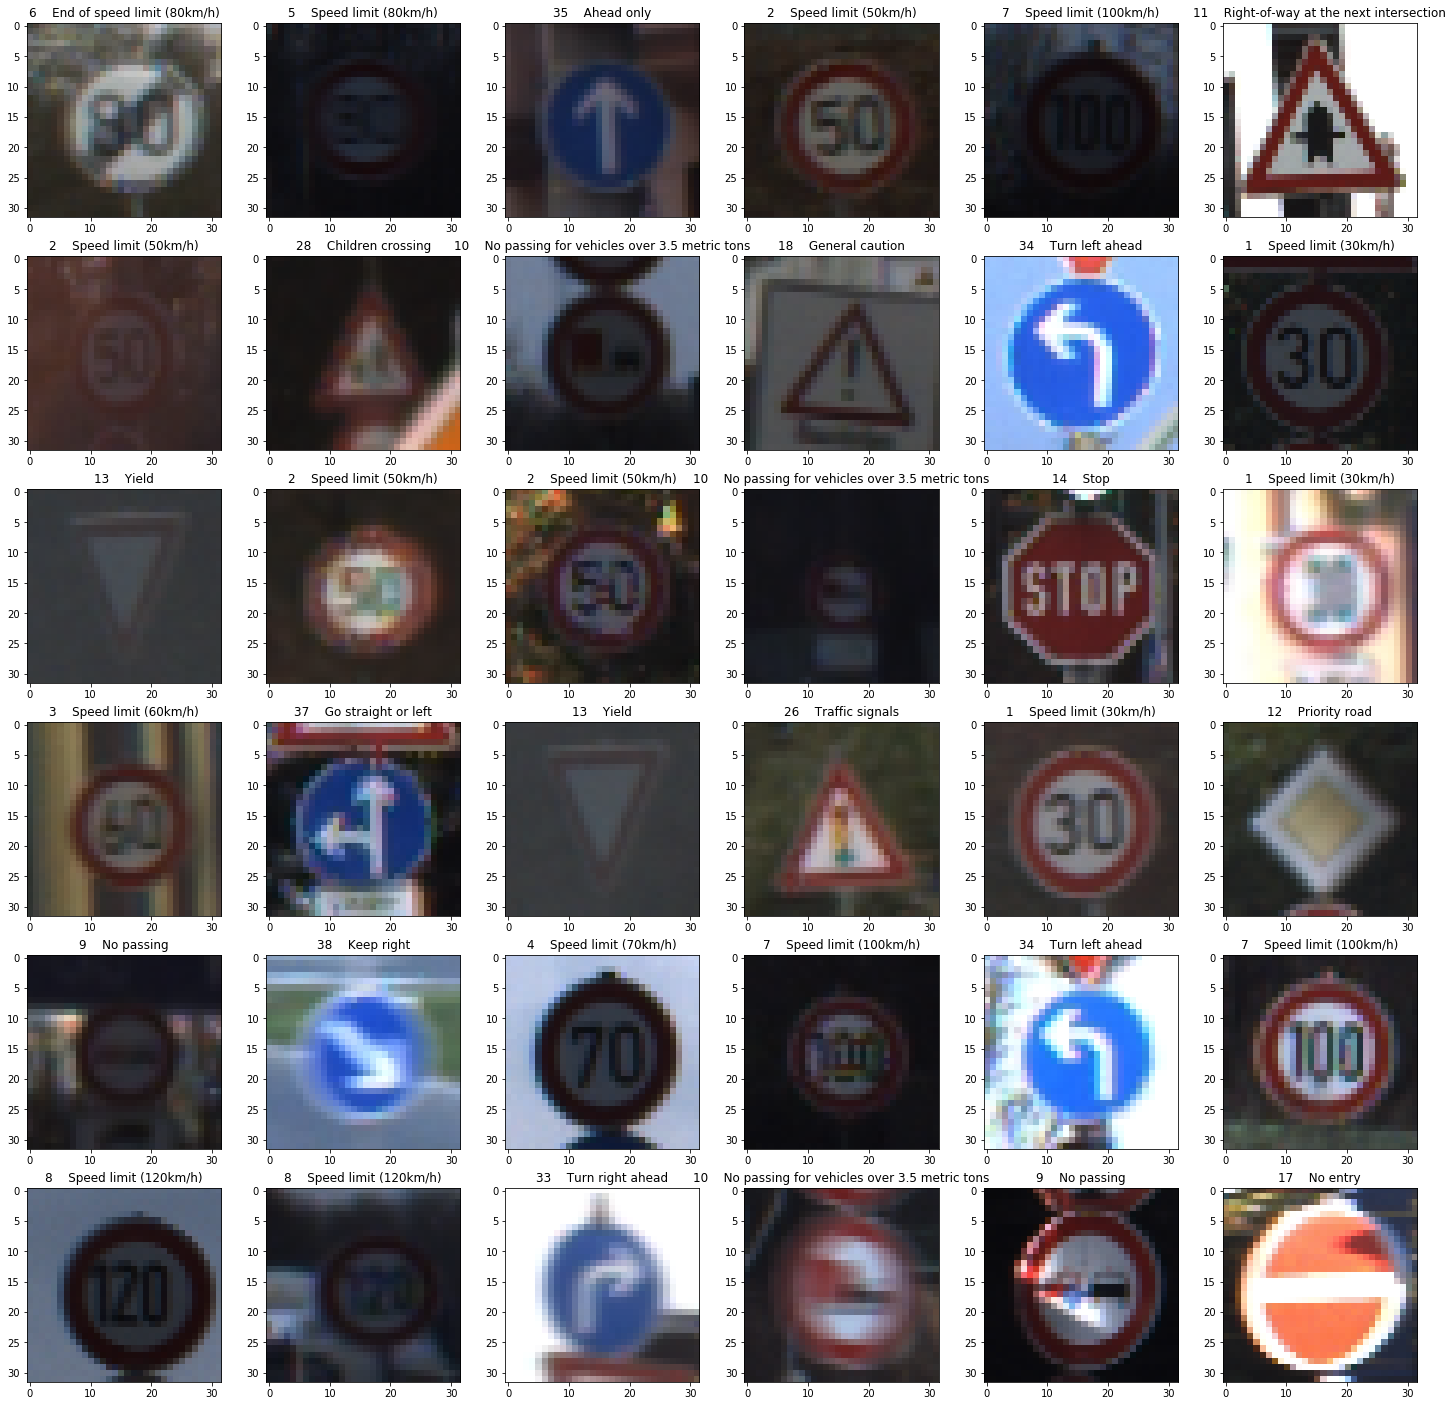

In [9]:
#show example images of the testing set

rows = 6
cols = 6

fig, axs = plt.subplots(rows,cols, figsize = (25,25))

for i in range(rows):
    for j in range(cols):
        
        sample = int(np.size(x_test,0)*random.random())
        ClassId = y_test[sample]
        label = labels[labels["ClassId"] == ClassId]["SignName"].to_string()        
        axs[i,j].imshow(x_test[sample]/255)
        axs[i,j].set_title(label)
    
fig.show()

Let's visualize the first images of the training set. As we can see all of them belong to the same label. Therefore training data is sorted and it will need to be shuffled.

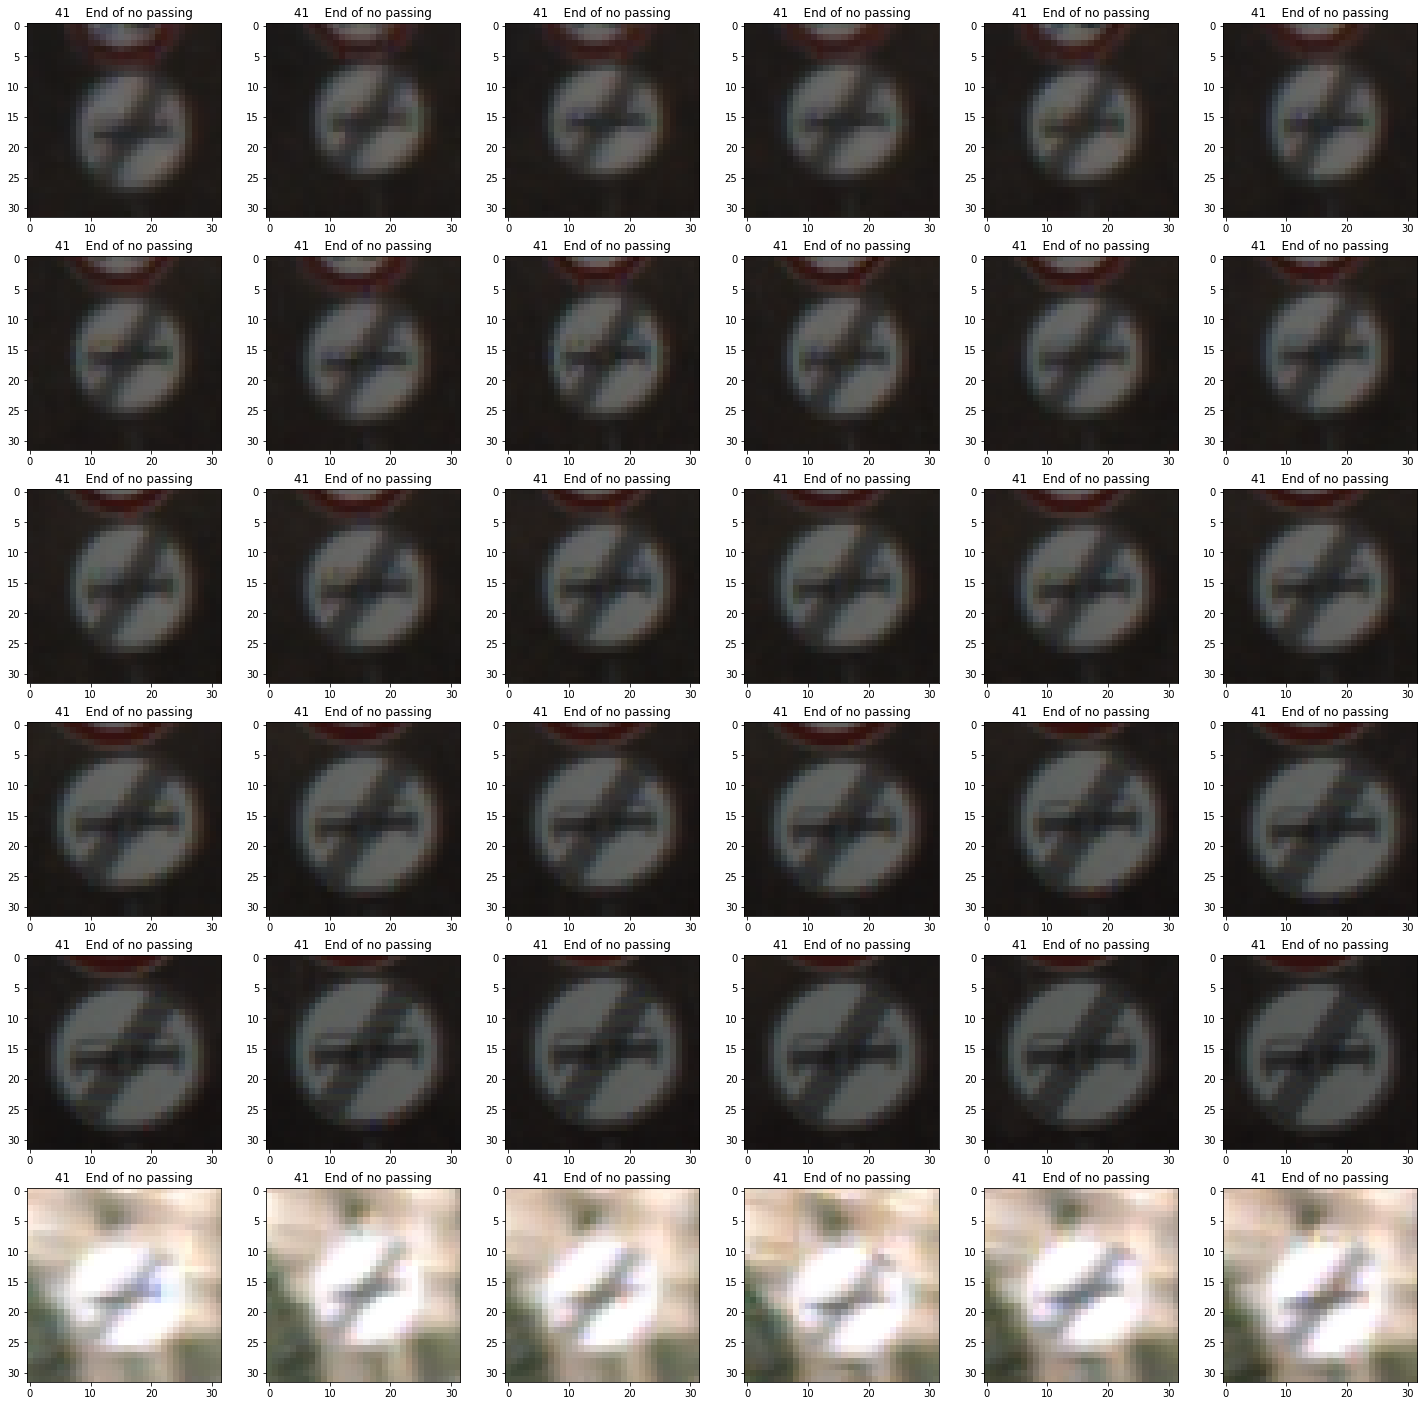

In [10]:
#show example images of the training set

rows = 6
cols = 6
sample = 0

fig, axs = plt.subplots(rows,cols, figsize = (25,25))

for i in range(rows):
    for j in range(cols):
              
        ClassId = y_train[sample]
        label = labels[labels["ClassId"] == ClassId]["SignName"].to_string()        
        axs[i,j].imshow(x_train[sample]/255)
        axs[i,j].set_title(label)
        sample = sample + 1
    
fig.show()

Let's visualize an histogram pof the labels in order to see the number of examples of each class

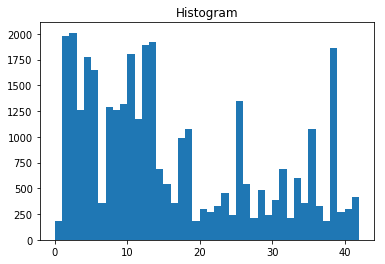

In [11]:
plt.hist(y_train, bins = labels['ClassId']) 
plt.title("Histogram") 
plt.show()

As we can see we have an unbalanced set of classes. Therefore it would be optimal to use data augmentation technique no create a more balanced training data set.